# Regresion Logistica Simple


Establecer un modelo que permita calcular la probabilidad de obtener matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. 

La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene.

In [2]:
# Para Tratamientos de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Procesamiento y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# configuracion matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# configuracion warning
import warnings
warnings.filterwarnings('ignore')



# Datos

In [3]:
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])
matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])
datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})
datos.head(3)


,matricula,matematicas
0,0,41
1,0,53
2,0,54


# Exploracion grafica


In [4]:
# Numero de obs por clase

datos.matricula.value_counts().sort_index()

# 0 = no tiene matricula
# 1 = con matricula

0    151
1     49
Name: matricula, dtype: int64

Text(0.5, 1.0, 'Distribución notas de matemáticas por clase')

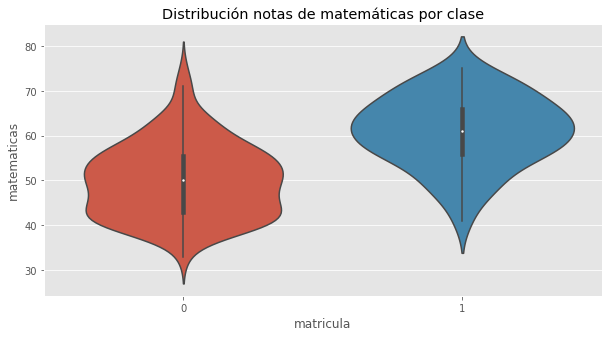

In [5]:
# Grafico 1

fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(
        x     = 'matricula',
        y     = 'matematicas',
        data  = datos,
        #color = "white",
        ax    = ax)

ax.set_title('Distribución notas de matemáticas por clase')



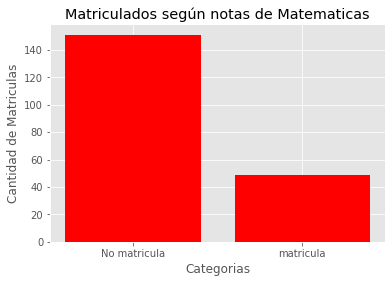

In [10]:
# Grafico 2
## Declaramos valores para el eje x
eje_x = ['No matricula', 'matricula']
 
## Declaramos valores para el eje y
eje_y = [151,49]
 
## Creamos Gráfica
plt.bar(eje_x, eje_y,color='red')
 
## Legenda en el eje y
plt.ylabel('Cantidad de Matriculas')
 
## Legenda en el eje x
plt.xlabel('Categorias')
 
## Título de Gráfica
plt.title('Matriculados según notas de Matematicas')
 
## Mostramos Gráfica
plt.show()


# Test de significancia



In [22]:
# Test entre las clases
res_ttest = ttest_ind(
                x1 = matematicas[matricula == 0],
                x2 = matematicas[matricula == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-8.245421127756737, p-value=2.2482437941234614e-14


**Tanto el gráfico como el t-test muestran evidencias de que existe una diferencia entre la nota de las personas con matrícula y sin matrícula. Esta información es útil para considerar la nota de matemáticas como un buen predictor para el modelo.**

# Ajuste del Modelo

La variable respuesta es la matricula y el predictor son las notas de matematicas.

In [16]:
# División de los datos en train y test
# se particiona la data en 80% y 20% para entrenamiento y testeo.
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True )

# Creación del modelo
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LogisticRegression(penalty='none')

In [19]:
# Informacion del modelo

print("Intercepto:", modelo.intercept_)
print("Coeficiente",list(zip(X.columns, modelo.coef_.flatten(),)))
print("Accuracy de entrenamiento", modelo.score(X,y))

Intercepto: [-8.98479044]
Coeficiente [('matematicas', 0.1439326699291702)]
Accuracy de entrenamiento 0.81


La precision media del modelo es 81%.

**Ahora se puede precedir nuevas observaciones**

In [23]:
# Predicciones probabilisticas

# Utilizando .predict_proba() se obtiene, para cada observacion la probabilidad predicha de pertenecer a cada una de las 2 clases.

predicciones = modelo.predict_proba(X=X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(4)

,0,1
0,0.685816,0.314184
1,0.838109,0.161891
2,0.443517,0.556483
3,0.479270,0.520730


In [26]:
# Predicciones con la clasificacion final
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = modelo.predict(X = X_test)
predicciones


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Statsmodels

Con este framework la regresion logistica es mas comppleta, ademas de ajustar el modelo, permite calcular los test estadisticos
y anslisis necesarios para verificar que se cumplan las condiciones sobre las que se basa este tipo de modelos.

Dos formas de entrenar el modelo

* Indicando la formula del modelo y pasando los datos de entrenamiento como un df que incluya la variable respuesta y predictores.
* Pasar 2 matrices, una con los predictores y otra con la variable respuesta, con la diferencia que a la matriz de predictores hay que añadir una primera columna de 1s.

In [31]:
# Division de la data en train y test

X = datos [['matematicas']]
y = datos ['matricula']

X_train, X_test, y_train, y_test = train_test_split(
X.values.reshape(-1,1),
y.values.reshape(-1,1),
train_size = 0.8,
random_state = 1234,
shuffle = True)

In [36]:
# Creacion del modelo utilizando el modo formula (similar a R)
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), 
          columns = ['matematicas','matricula'])

modelo = smf.logit(formula = 'matricula~matematicas', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.451215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              matricula   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                  0.2247
Time:                        16:40:47   Log-Likelihood:                -72.194
converged:                       True   LL-Null:                       -93.122
Covariance Type:            nonrobust   LLR p-value:                 9.831e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.9848      1.543     -5.821      0.000     -12.010      -5.960
matematicas     0.1439    

In [37]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.451215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                  0.2247
Time:                        16:58:22   Log-Likelihood:                -72.194
converged:                       True   LL-Null:                       -93.122
Covariance Type:            nonrobust   LLR p-value:                 9.831e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9848      1.543     -5.821      0.000     -12.010      -5.960
x1             0.1439      0.